In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn settings
sns.set_theme()
sns.set_context("talk")

# Palette
pal = 'crest'
my_cmap = sns.color_palette(pal, as_cmap=True)
my_pal = sns.color_palette(pal, 10)
sns.set_palette(my_pal)

In [75]:
# Broken with macOS Monteray
#from plot_scripts import import_data
#f_paths, f_dir = import_data()

In [2]:
# Load csvs
df1 = pd.read_csv(r'/Users/jack/Github/arbin/test_data/output/params_cycle_cell_1.csv')
df2 = pd.read_csv(r'/Users/jack/Github/arbin/test_data/output/params_cycle_cell_2.csv')
df3 = pd.read_csv(r'/Users/jack/Github/arbin/test_data/output/params_cycle_cell_3.csv')

lst_df = [df1, df2, df3]
df_temp = pd.concat(lst_df)

# Add cell number column
for cell, df in enumerate(lst_df):
    new_col = np.zeros(df.shape[0], dtype=int)
    new_col += cell
    df.insert(0, 'cell', new_col)

# Concatenate cell dataframes
df_plot = pd.concat(lst_df)
df_plot.reset_index(drop=True,inplace=True)

In [3]:
# Average data
df_avg = df_temp.groupby(['cycle']).mean().reset_index()

# Standard deviation
df_std = df_temp.groupby(['cycle']).std().reset_index()
df_std.drop(columns=['cycle','couEff'], inplace=True)
df_std.rename(columns={'Qp_mAh':'Qp_mAh_std','Qn_mAh':'Qn_mAh_std'}, inplace=True)

# Concatenate avg and std
df_avg = pd.concat([df_avg,df_std],axis=1)
df_avg.head(5)

,cycle,Qp_mAh,Qn_mAh,couEff,Qp_mAh_std,Qn_mAh_std
0,1,5.042658,5.076118,100.663714,0.015531,0.012094
1,2,5.091273,4.745675,93.212211,0.015908,0.016753
2,3,4.717786,4.486761,95.102390,0.016501,0.030962
3,4,4.461812,3.224578,72.252113,0.030786,0.247775
4,5,3.204584,0.507352,15.749035,0.247974,0.091784


[Text(0.5, 0, 'Cycle'), Text(0, 0.5, 'Capacity [mAh]')]

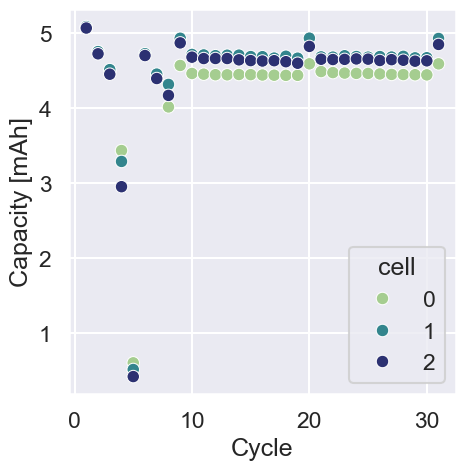

In [4]:
# Comparison of all cell cycles
fig1 = plt.figure(figsize=(5,5))
ax = sns.scatterplot(
                    data=df_plot,
                    x="cycle", y="Qn_mAh", hue='cell', palette=my_cmap
                    )
ax.set(xlabel='Cycle', ylabel='Capacity [mAh]')

[Text(0.5, 0, 'Cycle'), Text(0, 0.5, 'Capacity [mAh]')]

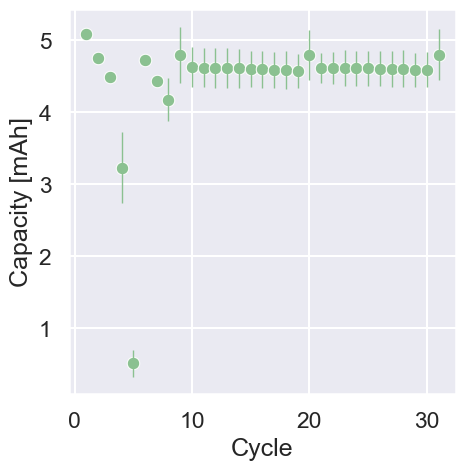

In [5]:
# Average of all cell cycles
fig2 = plt.figure(figsize=(5,5))
ax = sns.scatterplot(
                    data=df_avg, 
                    x='cycle', y='Qn_mAh'
                    )

ax.errorbar(
            df_avg.cycle, df_avg.Qn_mAh, yerr=df_avg.Qn_mAh_std*2, 
            marker='', linestyle='', lw=1
           )

ax.set(xlabel='Cycle', ylabel='Capacity [mAh]')